# Part I - (Project - Ford GoBike)
## by Samuel Sarpong

# 1. Introduction

This document explores a dataset containing information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [66]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt


%matplotlib inline


#setting figure size
#from matplotlib.pylab import rcParams
#rcParams['figure.figsize'] = 8,8
# set plot dimensions
#plt.figure(figsize=[14, 6])

import warnings
warnings.filterwarnings('ignore')

# 2. Data Wrangling

## 2.1 Gathering

In [67]:
bk = pd.read_csv('201902-fordgobike-tripdata.csv')

## 2.2 Assessing

In [68]:
# defining function to quickly give data information
def pc(col_num):
    """ Function to quickly give dtype, null count and sample data"""
    a = int(col_num)
    print(bk.iloc[:, a].sample(5))
    print('#######################################################')
    print(bk.iloc[:, a].dtype)
    print('#######################################################')
    print(f'Count of nans = {bk.iloc[:,a].isnull().sum()}')
    print('#######################################################')
    print(bk.iloc[:, a].describe())

In [69]:
pc(0)

68237      458
172190     472
83047      858
114629    1729
46843      550
Name: duration_sec, dtype: int64
#######################################################
int64
#######################################################
Count of nans = 0
#######################################################
count    183412.000000
mean        726.078435
std        1794.389780
min          61.000000
25%         325.000000
50%         514.000000
75%         796.000000
max       85444.000000
Name: duration_sec, dtype: float64


In [70]:
bk.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [71]:
bk.shape

(183412, 16)

In [72]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   duration_sec             183412 non-null  int64  
 1   start_time               183412 non-null  object 
 2   end_time                 183412 non-null  object 
 3   start_station_id         183215 non-null  float64
 4   start_station_name       183215 non-null  object 
 5   start_station_latitude   183412 non-null  float64
 6   start_station_longitude  183412 non-null  float64
 7   end_station_id           183215 non-null  float64
 8   end_station_name         183215 non-null  object 
 9   end_station_latitude     183412 non-null  float64
 10  end_station_longitude    183412 non-null  float64
 11  bike_id                  183412 non-null  int64  
 12  user_type                183412 non-null  object 
 13  member_birth_year        175147 non-null  float64
 14  memb

*Clearly, from the shape, some columns have null values like start station id, start station name, end station id, and end station name*


In [73]:
bk.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year
count,183412.000000,183215.000000,183412.000000,183412.000000,183215.000000,183412.000000,183412.000000,183412.000000,175147.000000
mean,726.078435,138.590427,37.771223,-122.352664,136.249123,37.771427,-122.352250,4472.906375,1984.806437
std,1794.389780,111.778864,0.099581,0.117097,111.515131,0.099490,0.116673,1664.383394,10.116689
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000
25%,325.000000,47.000000,37.770083,-122.412408,44.000000,37.770407,-122.411726,3777.000000,1980.000000
50%,514.000000,104.000000,37.780760,-122.398285,100.000000,37.781010,-122.398279,4958.000000,1987.000000
75%,796.000000,239.000000,37.797280,-122.286533,235.000000,37.797320,-122.288045,5502.000000,1992.000000
max,85444.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000


*Some member_birth_year values don't seem logical e.g min_value = 1878*

In [74]:
# Check null value for each column
bk.isna().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

In [75]:
# Check duplicated values
bk.duplicated().sum()

0

In [76]:
#checking percentage of null values
for col in bk.columns:
    pom =np.mean(bk[col].isnull())
    print('{} - {}%'.format(col, round(pom*100)))

duration_sec - 0%
start_time - 0%
end_time - 0%
start_station_id - 0%
start_station_name - 0%
start_station_latitude - 0%
start_station_longitude - 0%
end_station_id - 0%
end_station_name - 0%
end_station_latitude - 0%
end_station_longitude - 0%
bike_id - 0%
user_type - 0%
member_birth_year - 5%
member_gender - 5%
bike_share_for_all_trip - 0%


## Data Cleaning

In this section I will try to clean our data to make easier in visualization and exploration.

### Define:
>Setting columns to their correct datatypes

In [77]:
#Code
datype= {'start_time': 'datetime64',
         'end_time': 'datetime64',

         'start_station_id': 'object',
         'end_station_id': 'object',

         'start_station_latitude': 'object',
         'start_station_longitude':  'object',
         'end_station_latitude':  'object',
         'end_station_longitude':  'object',

         'bike_id': 'object',
         'user_type': 'category'}

bk = bk.astype(datype)

In [78]:
#Test
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             183412 non-null  int64         
 1   start_time               183412 non-null  datetime64[ns]
 2   end_time                 183412 non-null  datetime64[ns]
 3   start_station_id         183215 non-null  object        
 4   start_station_name       183215 non-null  object        
 5   start_station_latitude   183412 non-null  object        
 6   start_station_longitude  183412 non-null  object        
 7   end_station_id           183215 non-null  object        
 8   end_station_name         183215 non-null  object        
 9   end_station_latitude     183412 non-null  object        
 10  end_station_longitude    183412 non-null  object        
 11  bike_id                  183412 non-null  object        
 12  user_type       

### Define :
> Dropping null values


In [79]:
#Code
bk = bk.dropna()

In [80]:
#Test
bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   duration_sec             174952 non-null  int64         
 1   start_time               174952 non-null  datetime64[ns]
 2   end_time                 174952 non-null  datetime64[ns]
 3   start_station_id         174952 non-null  object        
 4   start_station_name       174952 non-null  object        
 5   start_station_latitude   174952 non-null  object        
 6   start_station_longitude  174952 non-null  object        
 7   end_station_id           174952 non-null  object        
 8   end_station_name         174952 non-null  object        
 9   end_station_latitude     174952 non-null  object        
 10  end_station_longitude    174952 non-null  object        
 11  bike_id                  174952 non-null  object        
 12  user_type       

### Define:
> Getting age out of birth year


In [81]:
#Code
bk['age'] = 2019 - bk['member_birth_year']
bk.drop('member_birth_year', axis=1, inplace=True)


In [82]:
# Define:Getting specific start and end times
# Code
time_intervals = [0,4,12,17,22,23]
time_labels=['Night/Early Morning', 'Morning', 'Afternoon', 'Evening', 'Night']
# Creating Features from time
bk['start_day'] = bk['start_time'].dt.day
bk['start_day_of_week'] = bk['start_time'].dt.day_name()
bk['start_hour'] = bk['start_time'].dt.hour
bk['end_day'] = bk['end_time'].dt.day
bk['end_day_of_week'] = bk['end_time'].dt.day_name()
bk['end_hour'] = bk['end_time'].dt.hour
bk['month'] = bk['start_time'].dt.month_name()

bk.drop('end_time', axis=1, inplace=True)
bk.drop('start_time', axis=1, inplace=True)


In [83]:
# Test
bk.head(10)

,duration_sec,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,...,member_gender,bike_share_for_all_trip,age,start_day,start_day_of_week,start_hour,end_day,end_day_of_week,end_hour,month
0,52185,21,Montgomery St BART Station (Market St at 2nd St),37.7896,-122.401,13,Commercial St at Montgomery St,37.7942,-122.403,4902,...,Male,No,35.0,28,Thursday,17,1,Friday,8,February
2,61854,86,Market St at Dolores St,37.7693,-122.427,3,Powell St BART Station (Market St at 4th St),37.7864,-122.405,5905,...,Male,No,47.0,28,Thursday,12,1,Friday,5,February
3,36490,375,Grove St at Masonic Ave,37.7748,-122.447,70,Central Ave at Fell St,37.7733,-122.444,6638,...,Other,No,30.0,28,Thursday,17,1,Friday,4,February
4,1585,7,Frank H Ogawa Plaza,37.8046,-122.272,222,10th Ave at E 15th St,37.7927,-122.249,4898,...,Male,Yes,45.0,28,Thursday,23,1,Friday,0,February
5,1793,93,4th St at Mission Bay Blvd S,37.7704,-122.391,323,Broadway at Kearny,37.798,-122.406,5200,...,Male,No,60.0,28,Thursday,23,1,Friday,0,February
6,1147,300,Palm St at Willow St,37.3173,-121.885,312,San Jose Diridon Station,37.3297,-121.902,3803,...,Female,No,36.0,28,Thursday,23,1,Friday,0,February
7,1615,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6329,...,Male,No,30.0,28,Thursday,23,1,Friday,0,February
8,1570,10,Washington St at Kearny St,37.7954,-122.405,127,Valencia St at 21st St,37.7567,-122.421,6548,...,Other,No,31.0,28,Thursday,23,1,Friday,0,February
9,1049,19,Post St at Kearny St,37.789,-122.403,121,Mission Playground,37.7592,-122.421,6488,...,Male,No,27.0,28,Thursday,23,1,Friday,0,February
10,458,370,Jones St at Post St,37.7873,-122.413,43,San Francisco Public Library (Grove St at Hyde...,37.7788,-122.416,5318,...,Female,Yes,23.0,28,Thursday,23,1,Friday,0,February


In [84]:
# Using pandas to create Categorical data
for hour in ['start_hour', 'end_hour']:
  bk[f'{hour.split("_")[0]}_day_part']=pd.cut(bk[hour],
                                                    bins=time_intervals,
                                                    labels=time_labels,
                                                    include_lowest=True,
                                                    )
  display(bk[f'{hour.split("_")[0]}_day_part'].value_counts().sort_index().to_frame())

,start_day_part
Night/Early Morning,2164
Morning,73472
Afternoon,58798
Evening,38946
Night,1572


,end_day_part
Night/Early Morning,2304
Morning,71862
Afternoon,56922
Evening,42117
Night,1747


In [85]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 23 columns):
 #   Column                   Non-Null Count   Dtype   
---  ------                   --------------   -----   
 0   duration_sec             174952 non-null  int64   
 1   start_station_id         174952 non-null  object  
 2   start_station_name       174952 non-null  object  
 3   start_station_latitude   174952 non-null  object  
 4   start_station_longitude  174952 non-null  object  
 5   end_station_id           174952 non-null  object  
 6   end_station_name         174952 non-null  object  
 7   end_station_latitude     174952 non-null  object  
 8   end_station_longitude    174952 non-null  object  
 9   bike_id                  174952 non-null  object  
 10  user_type                174952 non-null  category
 11  member_gender            174952 non-null  object  
 12  bike_share_for_all_trip  174952 non-null  object  
 13  age                      174952 non-null  fl

# 3 Exploration

* ### What is the structure of your dataset?

Initially, there were 183,412 rides in the data with 16 features but I have 174952 rides and 23 features in the dataset after cleaning

* #### What is/are the main feature(s) of interest in your dataset?

I am interested in finding out how duration relates to other features of the dataset

* #### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I am certain that the following will help me in my investigation : Location, Age, Gender, User type, Bike Share status, Time



## Univariate Exploration


(0.0, 3000.0)

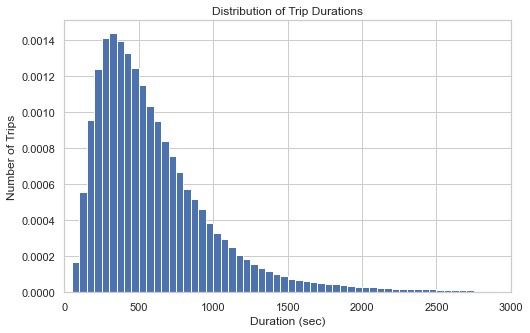

In [86]:
# standard-scaled plot
binsize = 50
bins = np.arange(50, bk['duration_sec'].max()+binsize, binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bk, x = 'duration_sec', bins = bins, density=True)
plt.title('Distribution of Trip Durations')
plt.xlabel('Duration (sec)')
plt.ylabel('Number of Trips')
plt.xlim(0,3000)

Trip duration is mostly concentrated on the lower spectrum. Most of the values are less than 2000 seconds.

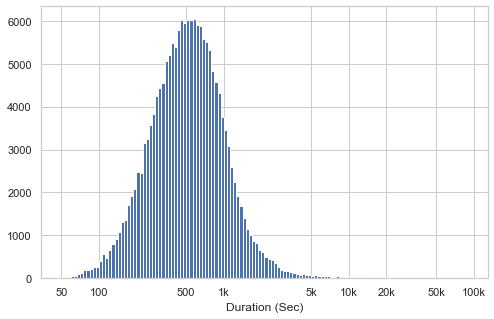

In [87]:
#due  to the long tail in the distribution, I will put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(1.7, np.log10(bk['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bk, x = 'duration_sec', bins=bins)
plt.xscale('log')
plt.xticks([50, 1e2, 5e2, 1e3, 5e3, 1e4, 2e4, 5e4, 1e5], [50, '100', '500', '1k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Duration (Sec)');

Duration has a long-tailed distribution, with a lot of trips on the short duration end (200 - 1000 secs) and few on the long duration end. It has a peak at around 500 secs and a smooth fall till around 10k secs. There are fewer longer durations afterwards with spaces in between

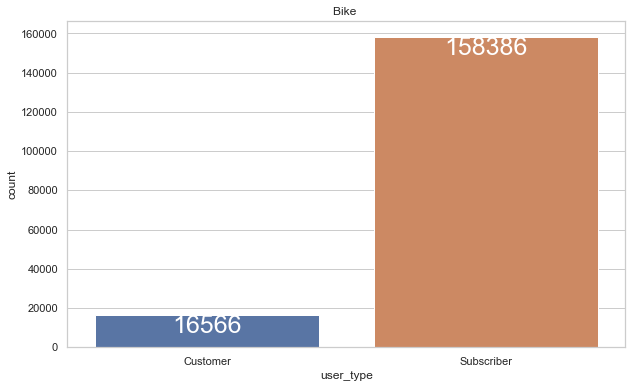

In [88]:
plt.figure(figsize=(10,6))     
base_color = sb.color_palette()[0]
ax = sb.countplot(data=bk, x ='user_type')

# add annotations
n_points = bk.shape[0]
cat_counts = bk['user_type'].value_counts()
locs, labels = plt.xticks() # get the current tick locations and labels

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = cat_counts[label.get_text()]
    pct_string = '{}'.format(count)

    # print the annotation just below the top of the bar
    plt.text(loc, count-8, pct_string, va='top', ha='center', color = 'white', fontsize=25)

plt.title('Bike ')



# Show the plot
plt.show();

There are more subscribers than customers

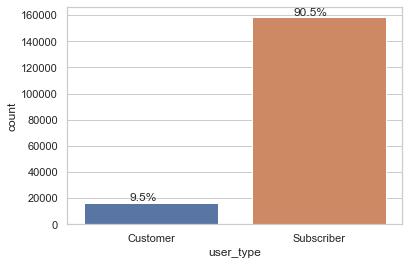

In [89]:
ax = sb.countplot(x="user_type", data=bk)

# This function is used to change the count plot numbers into percentages
def without_hue(plot, feature):
    total = len(feature)
    for p in plot.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total)
        x = p.get_x() + p.get_width() / 2 - 0.05
        y = p.get_y() + p.get_height()
        plot.annotate(percentage, (x, y), size = 12, va='bottom', ha='center')

without_hue(ax, bk.user_type)

The above graph shows that only 9.5% users are customers while 90.5% are subscribers


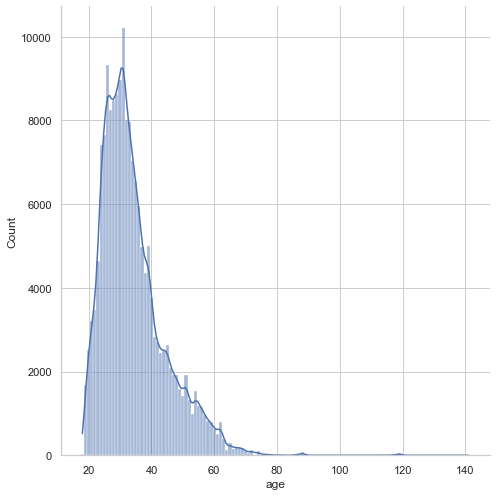

In [90]:
#age distribution
sb.displot(bk, x="age", binwidth=3, bins=20, discrete=True, height=7, kde=True);

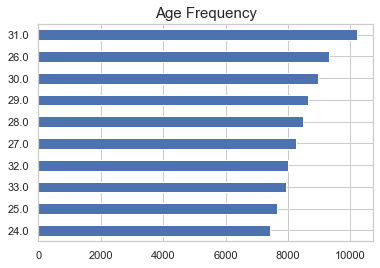

In [91]:
plt.title('Age Frequency', fontsize=15)
bk.age.value_counts(ascending=True).tail(10).plot.barh();

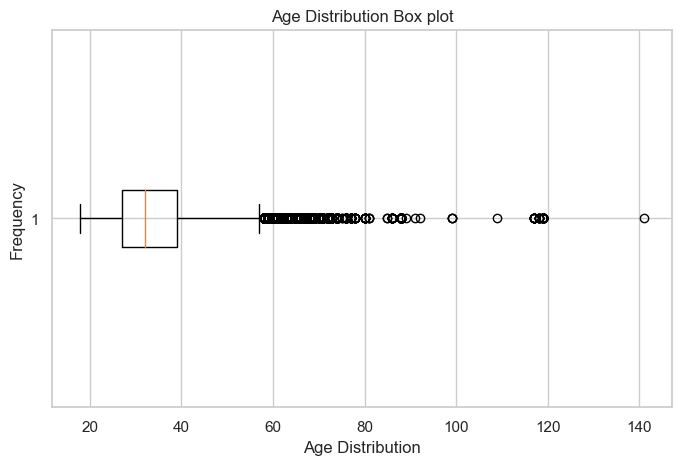

In [92]:
plt.figure(figsize=(8,5), dpi= 100)
plt.boxplot(bk['age'], vert=False)
plt.xlabel('Age Distribution')
plt.ylabel('Frequency')
plt.title('Age Distribution Box plot')

plt.show()

The above plots shows some outliers like an age of over 140yrs and majority of the users were within the 20 to 60 range.

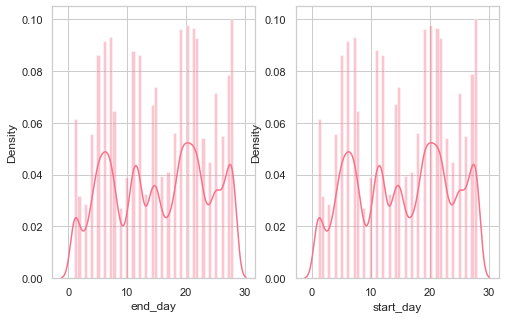

In [93]:
#Start and End days and hours
nrows, ncols = 1, 2
cols = bk.columns
color = sb.color_palette('husl',15)[0]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(8,5))
sb.distplot(bk['start_day'], color=color, ax = ax[1],kde=True);
sb.distplot(bk['end_day'],color=color, ax = ax[0],kde=True);


In [94]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

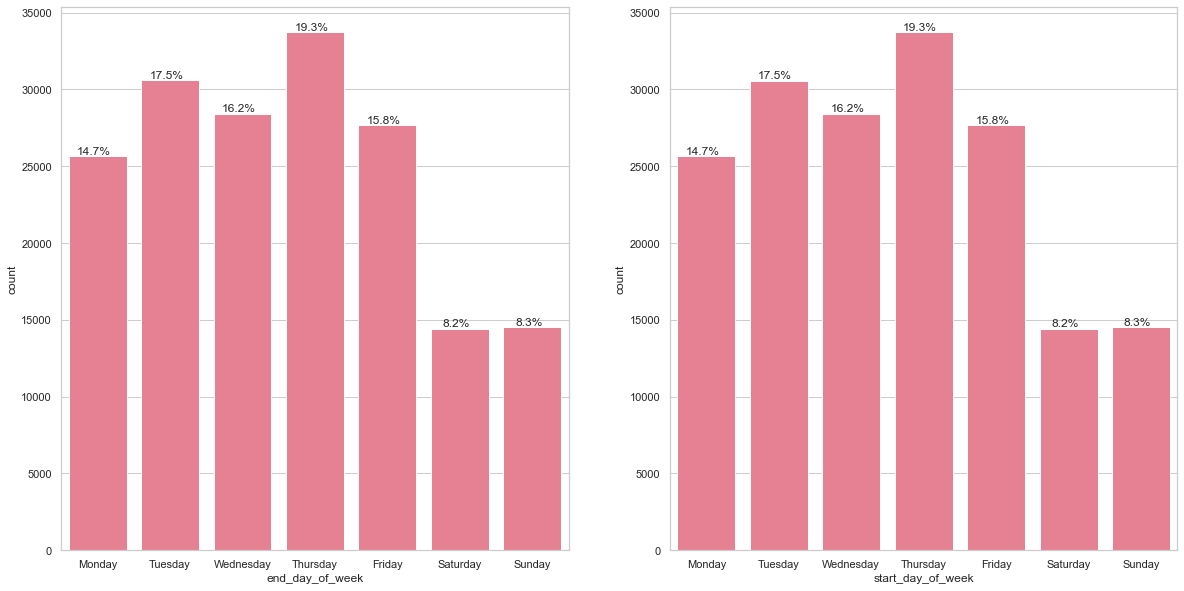

In [95]:
# Start and End Day pf weeks
nrows, ncols = 1, 2
color = sb.color_palette('husl', 15)[0]
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20,10))

plot1 = sb.countplot(data=bk, x='start_day_of_week', order=day_order, color=color, ax = ax[1]);
without_hue(plot1, bk.start_day_of_week)
plot2 = sb.countplot(data=bk, x='end_day_of_week',order=day_order, color=color, ax = ax[0]);
without_hue(plot2, bk.end_day_of_week)

Most of the trips were taken (start and end days) on Thurdays, followed by Tuedays, then, Friday, Wednesday and Monday. Also, weekends have the lowest trip records

<AxesSubplot:xlabel='end_hour', ylabel='count'>

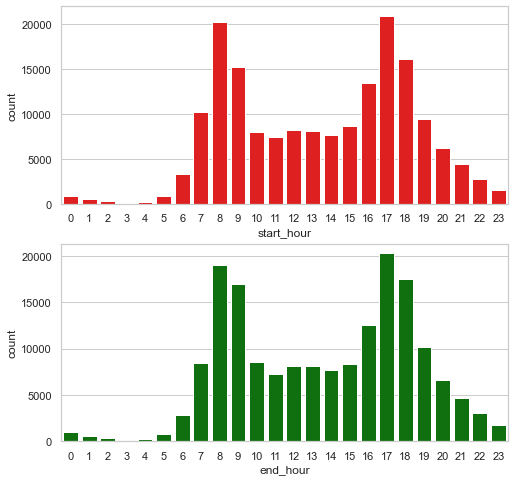

In [96]:
fig, ax = plt.subplots(2,figsize = [8,8])

default_color = sb.color_palette()[0]
sb.countplot(data = bk, x = 'start_hour', color = 'red',  ax = ax[0])
sb.countplot(data = bk, x = 'end_hour', color = 'green', ax = ax[1])

Both start and end day plots are identical, but for the start and end hour there is an obvious difference specifically in the hour 8 and 22 and the rest similar. For the week day the most active day Thursday and the least active were Sunday and Saturday

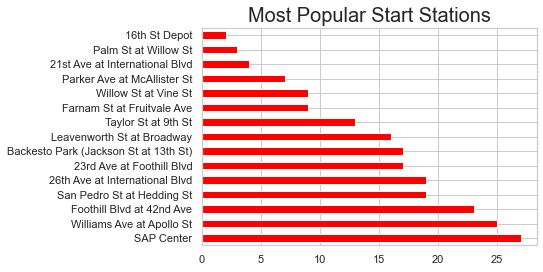

In [97]:
plt.title('Most Popular Start Stations', fontsize=20)
bk.start_station_name.value_counts(ascending=False).tail(15).plot.barh(color='red');

Most trips start from the SAP Center while 16th St Depot has the less than 5

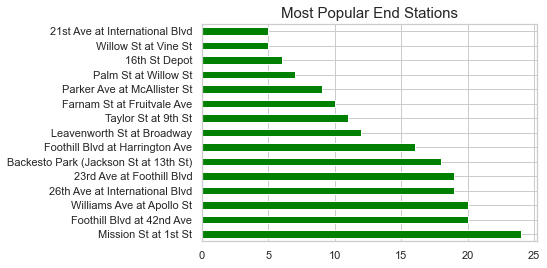

In [98]:
plt.title('Most Popular End Stations', fontsize=15)
bk.end_station_name.value_counts(ascending=False).tail(15).plot.barh(color='green');

Mission St at 1st St is the highest end station per the above graph

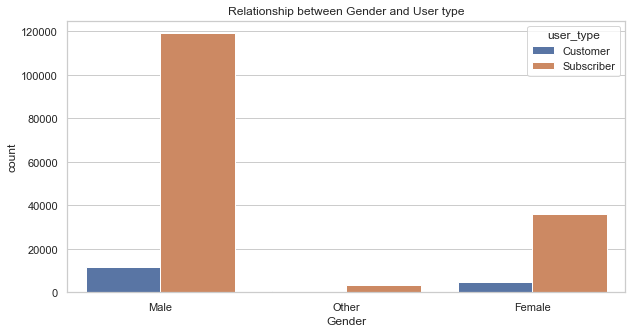

In [99]:
plt.figure(figsize=[10,5])
sb.countplot(data=bk ,hue ='user_type',x='member_gender')
plt.title('Relationship between Gender and User type')
plt.xlabel('Gender');

Clearly, most subscribers were males while on the female user, majority of the female users were subscribers

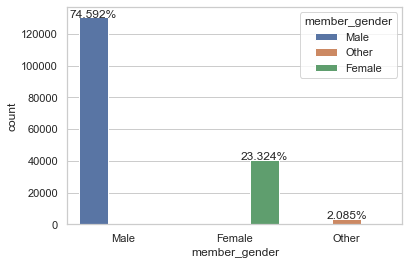

In [100]:
#ride frequency per gender
sb.set_theme(style='whitegrid')
ax = sb.countplot(data = bk, x = 'member_gender', order=bk.member_gender.value_counts().index, hue='member_gender')

total = len(bk)
for p in ax.patches:
    percentage = '{:.3f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()/2
    y = p.get_height()+.05
    ax.annotate(percentage, (x, y),ha='center')
plt.show();

74.6% of the riders were males as 23.32% were females

 ### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

>> The data had some null values which i later dropped. Age also has some outliers and I changed some column names
### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> yes I did some data assessing and cleaning to treat some quality issues. I also extracted day and hours from the provided times and also age from birth year
I did those operations to make our data tidy and get better analysis results.

##  Bivariate Exploration


In [114]:
catvals = ['user_type','member_gender','bike_share_for_all_trip','start_day','start_day_of_week','start_hour','end_day','end_hour']


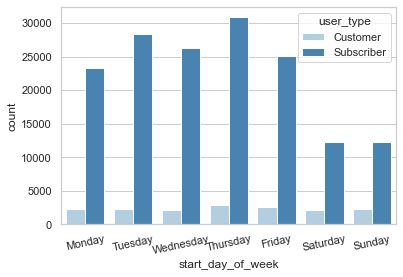

In [115]:
#day vs user type
ordinal_var_dict = {'start_day_of_week': ['Monday','Tuesday','Wednesday','Thursday','Friday', 'Saturday', 'Sunday'],
                    }

for var in ordinal_var_dict:
    ordered_var = pd.api.types.CategoricalDtype(ordered = True,
                                                categories = ordinal_var_dict[var])
    bk[var] = bk[var].astype(ordered_var)

sb.countplot(data = bk, x = 'start_day_of_week', hue = 'user_type', palette = 'Blues')
ax.legend(ncol = 1) # re-arrange legend to reduce overlapping
plt.xticks(rotation=12)
plt.show()

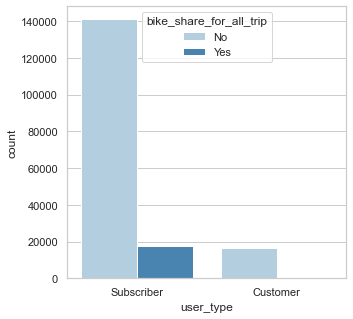

In [103]:
plt.figure(figsize=[5,5])
#bikeshare for all trips against usertype
sb.countplot(data = bk, x = 'user_type', hue = 'bike_share_for_all_trip', order=bk.user_type.value_counts().index,
             palette = 'Blues')
plt.show()

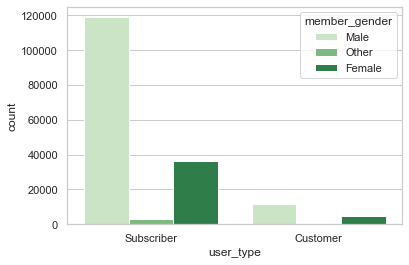

In [104]:
#user_type against gender
sb.countplot(data = bk, x = 'user_type', hue = 'member_gender',order=bk.user_type.value_counts().index,
             palette = 'Greens')
ax.legend(loc = 1, ncol = 2) # re-arrange legend to remove overlapping
plt.show()

The use of this service for Subscribers is high on weekdays and decreases on weekends. In contrast to Subscribers, Customers have increased on weekends, starting from Friday and decreasing on Sundays. It is possible that the newcomers will return to their respective places that day, because Monday they have started their activities again.


### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

* Customers ride less than subscribers
* The weekend days duration of riding is way more than other days

## Multivariate Exploration

Create plots of three or more variables to investigate your data even further.

### 3.3.1 Age and duration with Gender or user type

<AxesSubplot:xlabel='age', ylabel='duration_sec'>

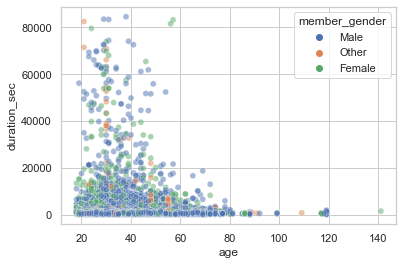

In [105]:
# Age and duration with gender
sb.scatterplot(data=bk,y='duration_sec',x='age', alpha=0.5, hue='member_gender', legend='full')

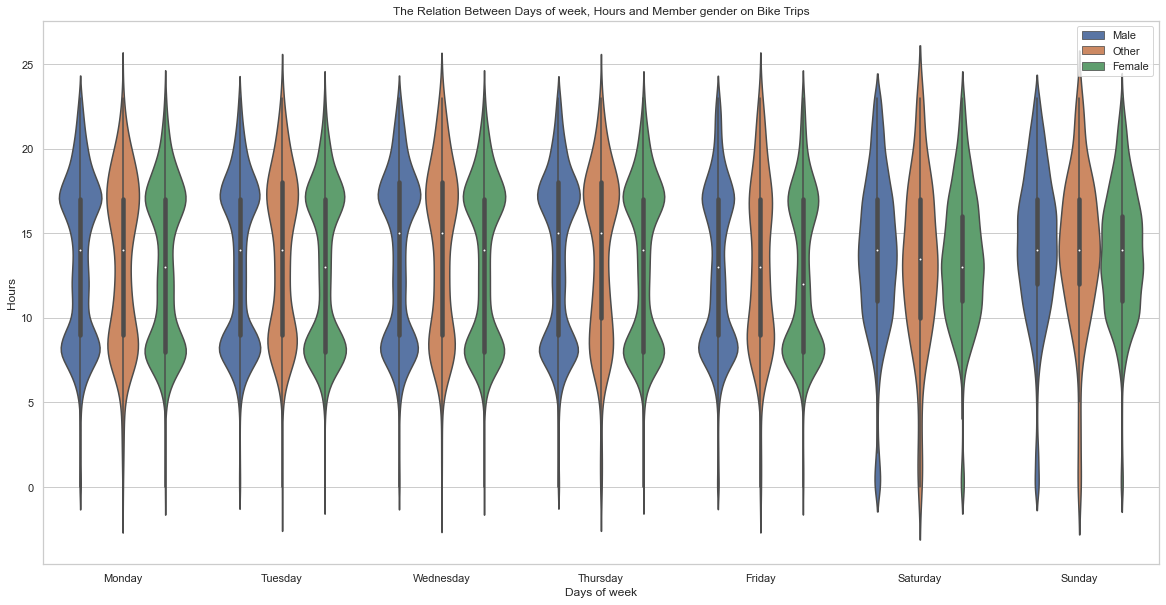

In [113]:
plt.figure(figsize=[20,10])
sb.violinplot(data=bk,x='start_day_of_week',y='start_hour',hue='member_gender')
plt.legend(loc=1)
plt.title('The Relation Between Days of week, Hours and Member gender on Bike Trips')
plt.xlabel('Days of week')
plt.ylabel('Hours');



Most trips are withing the weekend and mostly done by females

most of customer and subcribers rides are under 20000 in all ages. However above the age of 70 most riders are subscribers

In [ ]:
# Start and End day
sb.relplot(
    data=bk, kind="line",
    x="start_day", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)
sb.relplot(
    data=bk, kind="line",
    x="end_day", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)

* For male customers most riding duration when the customer starts the ride in the second week of the month
* For male customers most rides duration ends with the 10th of the month
* For Female customers the rides with the most duration are in the second week of the month too
* For Female customers rides ends between the 10th and the 15th are with the most duration
* Subscribers both male and female don't give that much of details

In [ ]:
# Start and End day
sb.relplot(
    data=bk, kind="line",
    x="start_hour", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)
sb.relplot(
    data=bk, kind="line",
    x="end_hour", y="duration_sec", col="member_gender",
    hue="user_type", style="user_type", markers=True,
)

* Male customers rides with the most duration Starts before 5 and ends around 5 while female customers rides with the most duration starts also before 5 but ends also before 5
* Females who starts their rides before 5 and those who ends their rides before 5 tend to ride more than male in all times
* Most duration rides by female subscribers ends before 5

## Conclusions.
>The average duration for all trips is about 500 seconds
>Only subscribers are allowed to share bikes on trips
>Females spend more duration than males
>Customers travel for longer durations regardless of the day of the week as compared to subscribers.
>The rush hours; going to work in the morning (8 and 9 hrs) and closing in the evening (17 and 18 hrs) have the highest trip records

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'p1 exploration.ipynb'])

In [ ]:
import os
os.makedirs('/Users/notime/DataScience/ALX/p3/sub', exist_ok=True)
bk.to_csv('/Users/notime/DataScience/ALX/p3/sub/newbk.csv')

In [ ]:
def convert(string) :

    n = len(string);
    string = list(string);

    for i in range(n) :

        # Converting space to underscore
        if (string[i] == '_') :
            string[i] = '';
        else :
            # If not space, convert
            # into lower character
            string[i] = string[i].lower();

    string = "".join(string)
    print(string);

# Driver program
if __name__ == "__main__" :

    string = "for_Secreet_fun";

    # Calling function
    convert(string);
